# Ultimate Technologies Inc. Take-Home Challenge

## Part 1 ‐ Exploratory data analysis

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

### Load data

In [2]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [4]:
logins['login_time'] = pd.to_datetime(logins['login_time'])

In [5]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
logins = logins.reset_index()
logins.drop('index', axis=1, inplace=True)
logins = logins.set_index('login_time')
logins['Count'] = 1
logins = logins.resample('15min').sum()

In [8]:
logins.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


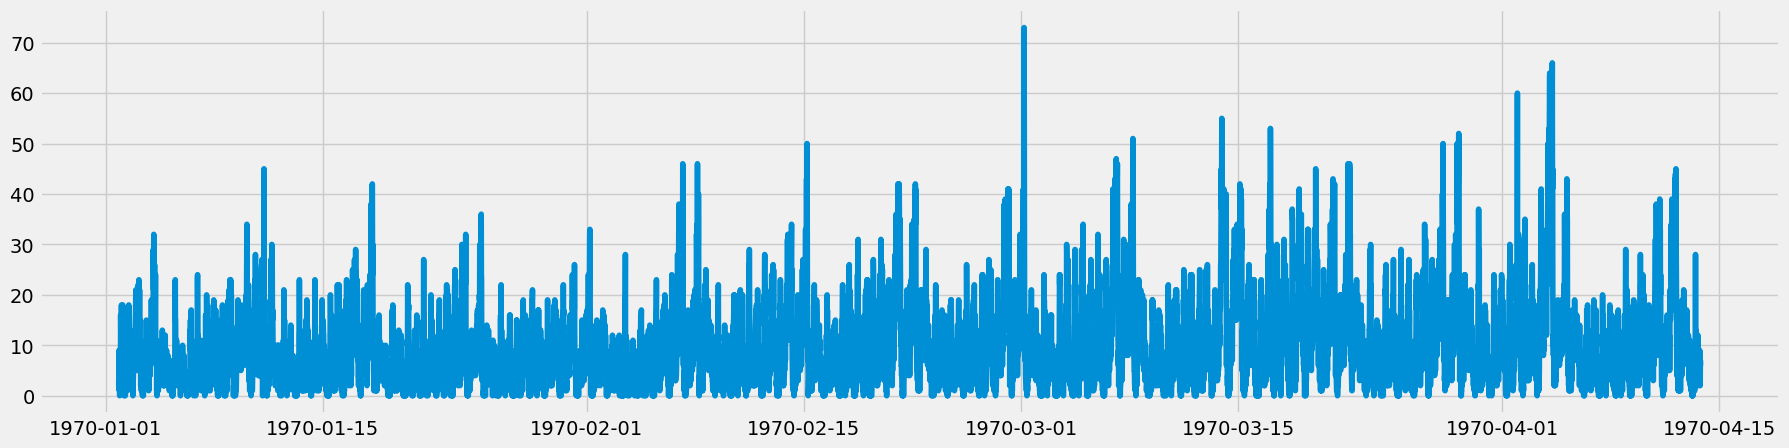

In [9]:
plt.figure(figsize = (20, 5))
plt.plot(logins)

Patern shows me there is routine change weekly. But there is some peaks that I should notice.

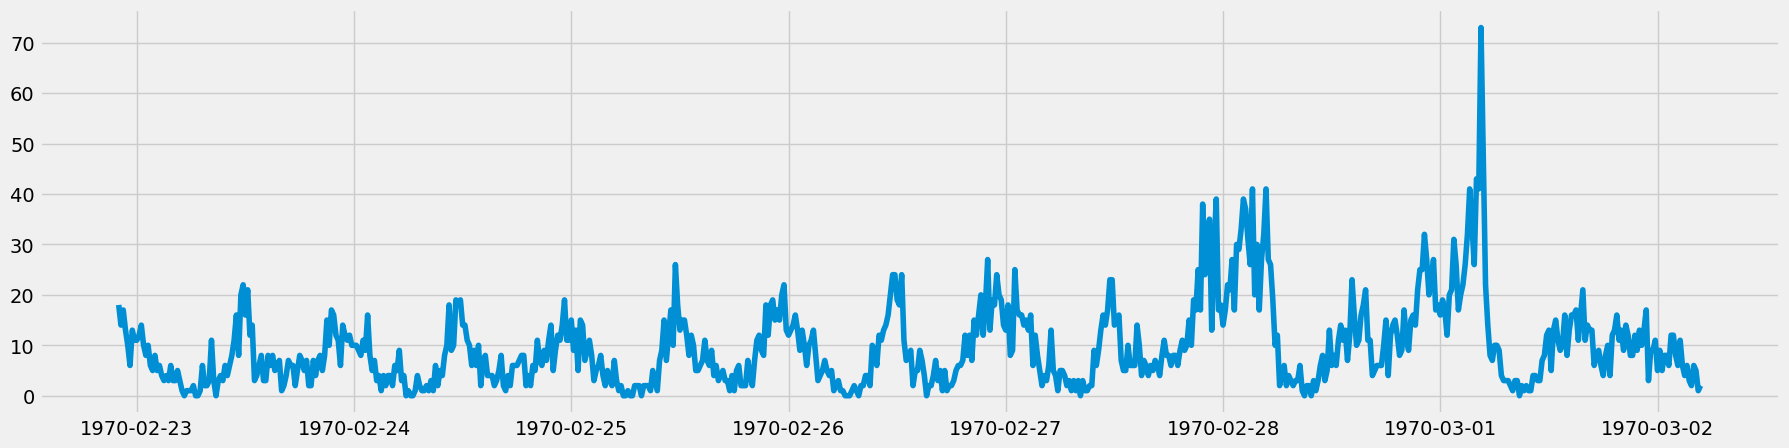

In [10]:
plt.figure(figsize = (20, 5))
plt.plot(logins[5000:5700])

Every day we have tow peaks

In [11]:
logins['Count'].max()

73

In [12]:
logins[logins['Count'] == 73].index.dayofweek

Int64Index([6], dtype='int64', name='login_time')

It happened weekend on Sunday. That makes sense.

## Part 2 ‐ Experiment and metrics design

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the
observation

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. Toll free, extra pay in the weekday,  working 4 days per week, offering bonuses for active driver.

2. 

a) I can give the information that the want to pass the bridge. I can analyze them in time series to give the result.

b) The counts of passing during the time is useful. Additionally, we find the peak and pattern to predict data with my model.

c) 

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

### Load data

In [13]:
ultimate_data_challenge = pd.read_json('ultimate_data_challenge.json')
ultimate_data_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
ultimate_data_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
ultimate_data_challenge.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [16]:
ultimate_data_challenge.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [17]:
ultimate_data_challenge['signup_date'] = pd.to_datetime(ultimate_data_challenge['signup_date'])
ultimate_data_challenge['last_trip_date'] = pd.to_datetime(ultimate_data_challenge['last_trip_date'])

In [18]:
ultimate_data_challenge['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [19]:
ultimate_data_challenge['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [20]:
(len(ultimate_data_challenge[ultimate_data_challenge['ultimate_black_user']== True])/
len(ultimate_data_challenge['ultimate_black_user'])) *100

37.708000000000006

In [21]:
len(ultimate_data_challenge['ultimate_black_user'])

50000

In [22]:
len(ultimate_data_challenge[ultimate_data_challenge['ultimate_black_user']== True])

18854

In [23]:
len(ultimate_data_challenge[ultimate_data_challenge['ultimate_black_user']!= True])

31146

In [24]:
ultimate_data_challenge['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [25]:
for i in  ultimate_data_challenge.itertuples():
    signup_date = pd.Timestamp(i.signup_date)
    t_180D = signup_date + pd.Timedelta('181D')
    t_180D_30D = t_180D - pd.Timedelta('30D')
    if t_180D_30D <= pd.Timestamp(i.last_trip_date) <= t_180D:
        ultimate_data_challenge.loc[i.Index, 'Active'] = 1
    else:
        ultimate_data_challenge.loc[i.Index, 'Active'] = 0

In [26]:
ultimate_data_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


4th row can show us why this user is Actice. We should compare 'signup_date' and 'last_trip_date' columns

In [27]:
ultimate_data_challenge['Active'].value_counts()

0.0    37802
1.0    12198
Name: Active, dtype: int64

In [28]:
print('Active percent :{}%'.format(12198/(12198+37802)*100))

Active percent :24.396%


24% is the answer of first question. 

<Axes: xlabel='avg_dist', ylabel='Active'>

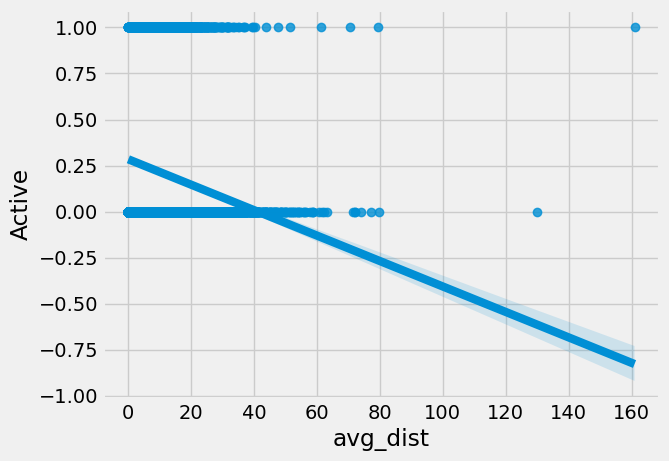

In [29]:
sns.regplot(x=ultimate_data_challenge['avg_dist'], y=ultimate_data_challenge['Active'], fit_reg=True)

Actives has the lower avg_dist.

<Axes: xlabel='avg_rating_of_driver', ylabel='Active'>

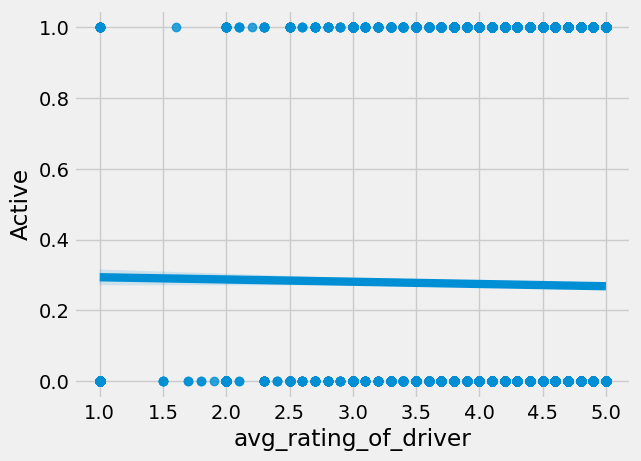

In [30]:
sns.regplot(x=ultimate_data_challenge['avg_rating_of_driver'], y=ultimate_data_challenge['Active'], fit_reg=True)

<Axes: xlabel='avg_rating_by_driver', ylabel='Active'>

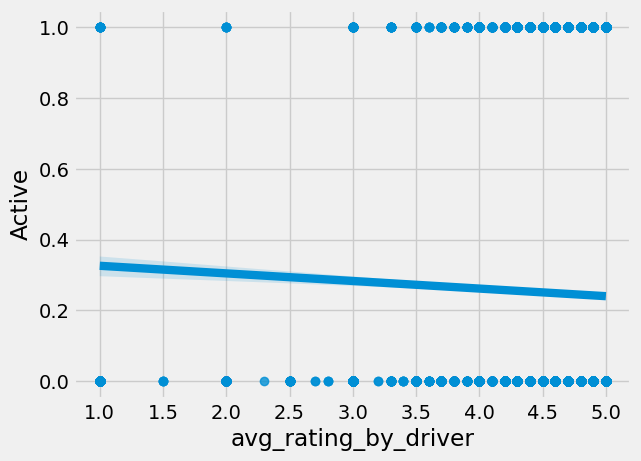

In [31]:
sns.regplot(x=ultimate_data_challenge['avg_rating_by_driver'], y=ultimate_data_challenge['Active'], fit_reg=True)

For training, I drop 'signup_date', 'last_trip_date' columns. And I tried to fill missing value

In [32]:
ultimate_data_challenge = ultimate_data_challenge.drop(['signup_date', 'last_trip_date'], axis=1)

In [33]:
ultimate_data_challenge.isnull().sum()

city                         0
trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
Active                       0
dtype: int64

In [34]:
mean_by = ultimate_data_challenge['avg_rating_by_driver'].mean()
ultimate_data_challenge['avg_rating_by_driver'].fillna(mean_by, inplace = True)
mean_of = ultimate_data_challenge['avg_rating_of_driver'].mean()
ultimate_data_challenge['avg_rating_of_driver'].fillna(mean_of, inplace = True)

In [35]:
ultimate_data_challenge['phone'].fillna('Other', inplace = True)

In [36]:
ultimate_data_challenge.isnull().sum()

city                      0
trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
Active                    0
dtype: int64

In [37]:
ultimate_data_challenge['ultimate_black_user'] = ultimate_data_challenge['ultimate_black_user'].astype(int)

In [38]:
ultimate_data_challenge.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,0.0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0.0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0.0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1.0
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0.0


## Dividing data X, y : 70, 30 

In [39]:
X = ultimate_data_challenge[ultimate_data_challenge.columns[:-1]]
y = ultimate_data_challenge[ultimate_data_challenge.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Pipeline for categorical columns

In [40]:
categorical_features = ["city", "phone", "ultimate_black_user"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

### Pipeline for numeric columns

In [41]:
numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", "avg_surge", "surge_pct",
                    "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

### Preprocessing

In [42]:
preprocess = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                             ("cat", categorical_transformer, categorical_features)])

pipeline = Pipeline(steps = [("pre", preprocess), ("rf", RandomForestClassifier(random_state = 42))])

params = {"rf__n_estimators": [30,50,75],
          "rf__max_depth": [2, 3, 5]}


### GridSearchCV

In [43]:
cv = GridSearchCV(pipeline, param_grid = params, cv = 3)
cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['avg_dist',
                                                                          'avg_rating_by_driver',
                                                                          'avg_rating_of_driver',
                                                                          'avg_surge',
                                                                          'surge_pct',
                                                                          'trips_in_first_30_days',
                                                                          'weekday_pct']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['city',
                                                                          'phone',
                                                                          'ultimate_black_user'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [2, 3, 5],
                         'rf__n_estimators': [30, 50, 75]})

### Modeling and check accuracy

In [45]:
cv.best_params_

{'rf__max_depth': 5, 'rf__n_estimators': 30}

In [46]:
cv.best_score_

0.7927714102733897

In [52]:
from sklearn import metrics
y_pred = cv.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred)
test_F1 = metrics.f1_score(y_test, y_pred)

In [53]:
print(test_acc, test_F1)

0.7912666666666667 0.4139996256784578


In [56]:
pipeline.fit(X_train, y_train)
feat_weight = pipeline.named_steps['rf'].feature_importances_
num_columns = ultimate_data_challenge[numeric_features].columns.values
cat_columns = pd.get_dummies(ultimate_data_challenge[categorical_features]).columns.values
total = list(num_columns) + list(cat_columns)

In [58]:
weight_dict = dict(zip(total, feat_weight))

In [59]:
weight_dict

{'avg_dist': 0.29807204887905175,
 'avg_rating_by_driver': 0.10353763200370876,
 'avg_rating_of_driver': 0.09429615329270696,
 'avg_surge': 0.08203378095404172,
 'surge_pct': 0.09247060037688386,
 'trips_in_first_30_days': 0.08840659444235201,
 'weekday_pct': 0.14893792749127927,
 'ultimate_black_user': 0.012273699104633018,
 'city_Astapor': 0.021634893407685943,
 "city_King's Landing": 0.008610779874911685,
 'city_Winterfell': 0.013390592895624671,
 'phone_Android': 0.0011959336372130997,
 'phone_Other': 0.013254088995558695,
 'phone_iPhone': 0.010624105903026967}

As we can see the most important parameter is avg_dist. weekday_pct and avg_rating_by_driver are effective on the next level.
phone_Other and city_Astapor are important in categorical features.